<a href="https://colab.research.google.com/github/Davichobacter/Machine-Learning-4GEEKS/blob/main/K_means_Project_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'

In [28]:
df = pd.read_csv(url)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [29]:
data = df[['Latitude', 'Longitude', 'MedInc']].copy()
data


,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [30]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Latitude', 'Longitude']])
data_scaled

array([[ 1.05254828, -1.32783522],
       [ 1.04318455, -1.32284391],
       [ 1.03850269, -1.33282653],
       ...,
       [ 1.77823747, -0.8237132 ],
       [ 1.77823747, -0.87362627],
       [ 1.75014627, -0.83369581]])

In [31]:
data['Latitude'] = data_scaled[:, 0]
data['Longitude'] = data_scaled[:, 1]
data

,Latitude,Longitude,MedInc
0,1.052548,-1.327835,8.3252
1,1.043185,-1.322844,8.3014
2,1.038503,-1.332827,7.2574
3,1.038503,-1.337818,5.6431
4,1.038503,-1.337818,3.8462
...,...,...,...
20635,1.801647,-0.758826,1.5603
20636,1.806329,-0.818722,2.5568
20637,1.778237,-0.823713,1.7000
20638,1.778237,-0.873626,1.8672


In [32]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

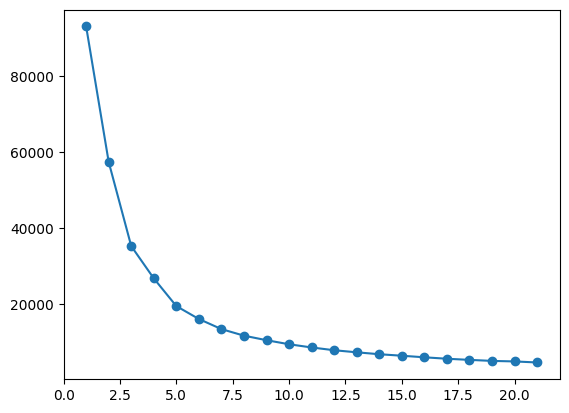

In [33]:
distortions = []
for i in range(1,22):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(X_train)
  distortions.append(km.inertia_)
plt.plot(range(1,22), distortions, marker='o')

In [34]:
robot = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=0)
robot.fit(X_train)

KMeans(n_clusters=6, n_init=10, random_state=0)

In [35]:
y = robot.predict(X_train)
X_train['cluster'] = y

In [36]:
X_train

,Latitude,Longitude,MedInc,cluster
14196,-1.367976,1.267645,3.2596,1
8267,-0.871699,0.703627,3.8125,1
17445,-0.455012,-0.454356,4.1563,1
14265,-1.377340,1.227714,1.9425,4
2271,0.537543,-0.114948,3.5542,3
...,...,...,...,...
11284,-0.867017,0.803453,6.3700,5
11964,-0.754652,1.067992,3.0500,1
5390,-0.749970,0.593818,2.9344,4
860,0.912092,-1.193070,5.7192,0


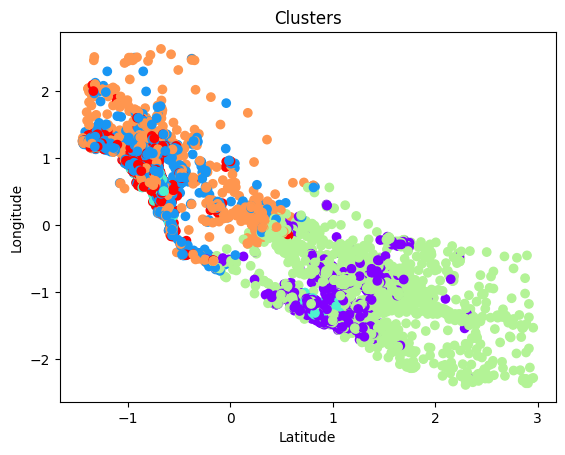

In [37]:
plt.scatter(X_train['Latitude'], X_train['Longitude'], c=X_train['cluster'], cmap='rainbow')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters')
plt.show()

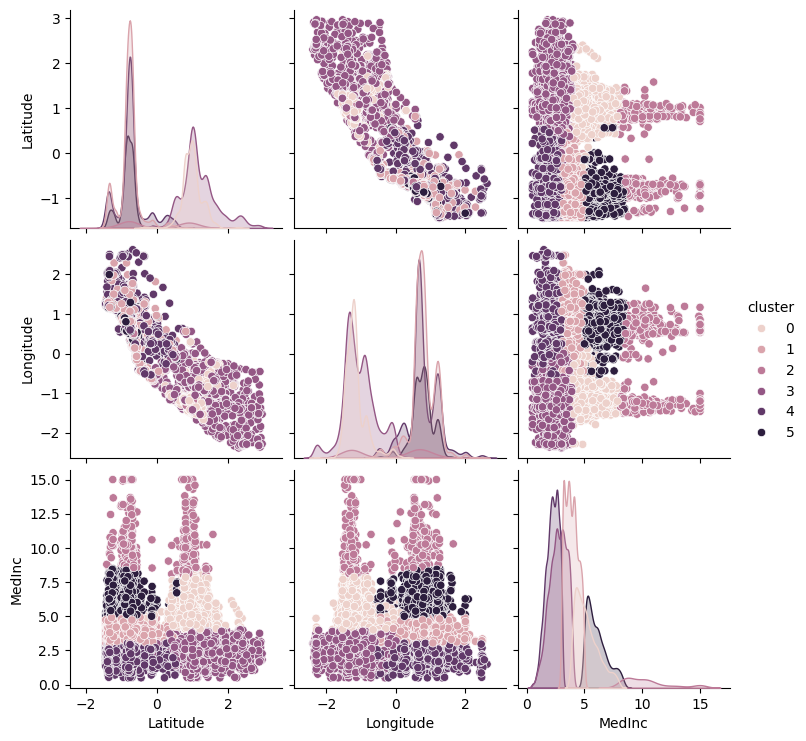

In [38]:
sns.pairplot(X_train, hue='cluster')
plt.show()

In [39]:
silhouette_vals = silhouette_samples(X_train[['Latitude', 'Longitude', 'MedInc']], X_train['cluster'], metric='euclidean')
silhouette_vals.shape[0] == X_train.shape[0]

True

0.41688760447549594


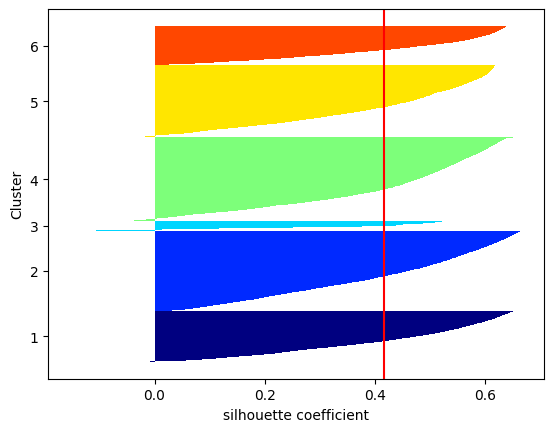

In [40]:
cluster_labels = np.unique(X_train['cluster'])
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_train[['Latitude', 'Longitude', 'MedInc']], X_train['cluster'], metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[X_train['cluster']==c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_lower + len(c_silhouette_vals)), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper)/2.0)
  y_ax_lower += len(c_silhouette_vals)
  silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
print(silhouette_avg)

In [41]:
X_test

,Latitude,Longitude,MedInc
20046,0.200449,0.279366,1.6812
3024,-0.230283,0.054757,2.5313
15663,1.015093,-1.432653,3.4801
20484,-0.632923,0.424114,5.7376
9814,0.462633,-1.178096,3.7250
...,...,...,...
15362,-1.063655,1.172810,4.6050
16623,-0.127282,-0.629052,2.7266
18086,0.785682,-1.237992,9.2298
2144,0.532861,-0.094982,2.7850


In [42]:
X_test['cluster'] = robot.predict(X_test)
X_test

,Latitude,Longitude,MedInc,cluster
20046,0.200449,0.279366,1.6812,4
3024,-0.230283,0.054757,2.5313,4
15663,1.015093,-1.432653,3.4801,3
20484,-0.632923,0.424114,5.7376,5
9814,0.462633,-1.178096,3.7250,3
...,...,...,...,...
15362,-1.063655,1.172810,4.6050,1
16623,-0.127282,-0.629052,2.7266,3
18086,0.785682,-1.237992,9.2298,2
2144,0.532861,-0.094982,2.7850,3


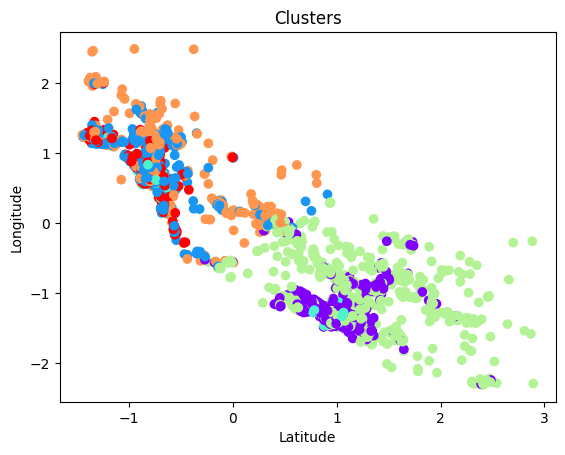

In [43]:
plt.scatter(X_test['Latitude'], X_test['Longitude'], c=X_test['cluster'], cmap='rainbow')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters')
plt.show()

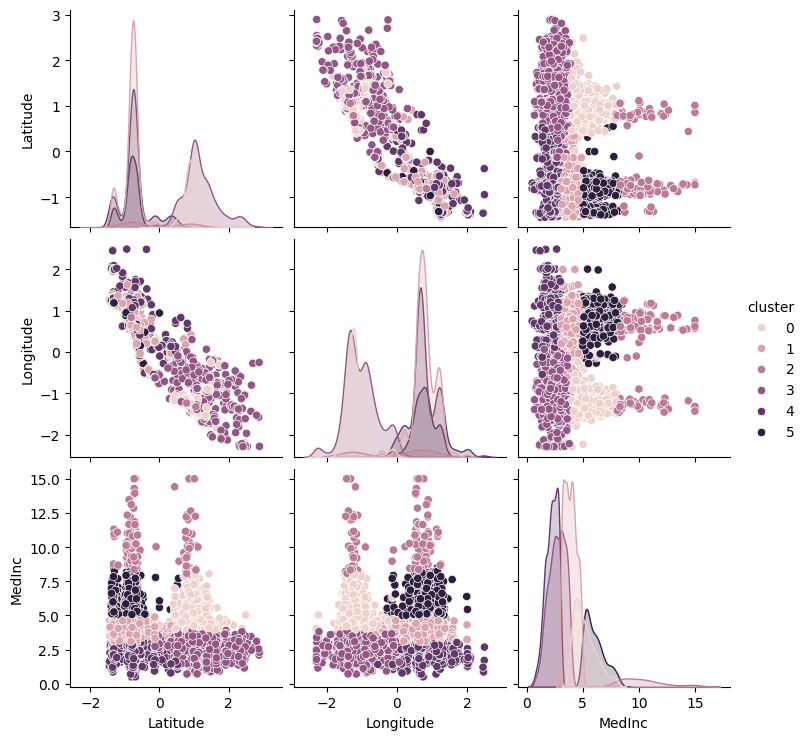

In [44]:
sns.pairplot(X_test, hue='cluster')
plt.show()

In [45]:
silhouette_vals = silhouette_samples(X_test[['Latitude', 'Longitude', 'MedInc']], X_test['cluster'], metric='euclidean')
silhouette_vals.shape[0] == X_test.shape[0]

True

0.4192833279890991


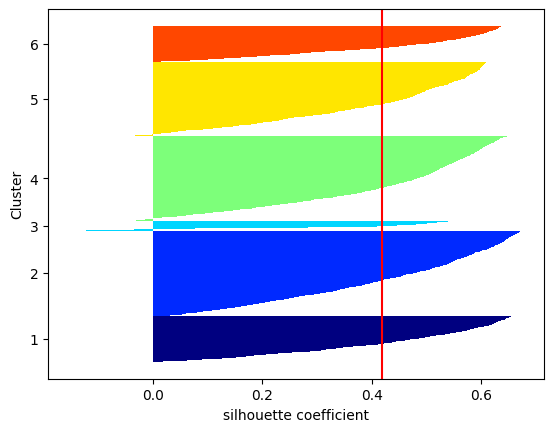

In [46]:
cluster_labels = np.unique(X_test['cluster'])
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_test[['Latitude', 'Longitude', 'MedInc']], X_test['cluster'], metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[X_test['cluster']==c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_lower + len(c_silhouette_vals)), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper)/2.0)
  y_ax_lower += len(c_silhouette_vals)
  silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
print(silhouette_avg)

<Axes: xlabel='Latitude', ylabel='Longitude'>

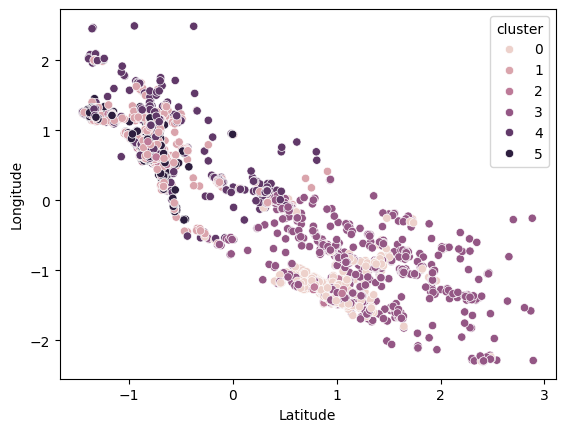

In [49]:
sns.scatterplot(data=X_test, x='Latitude', y='Longitude', hue='cluster')